In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import gaussian_kde

In [2]:
#import dataframe
album_df = pd.read_pickle('data/album_df.pkl')

In [3]:
album_df.head()

,album_run_time_ms,number_of_tracks,energy_mean,speechiness_mean,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,liveness_mean,valence_mean,...,score_amax,num_markets_amax,is_explicit_amax,mode_amax,key_amax,instrumentalness_amax,acousticness_amax,loudness_amax,danceability_amax,Genres
00S6tD68T69Opox43fMWAJ,2593940.0,10.0,0.229250,0.082110,0.546800,0.736810,0.738900,-12.205700,0.127010,0.345000,...,8.0,79.0,False,1.0,7.0,0.9430,0.992,-8.016,0.699,Jazz
00ojDEHvnEOPOjhHrUrKy5,2886000.0,10.0,0.384600,0.094240,0.724300,0.374767,0.532800,-15.015700,0.200730,0.362970,...,7.4,79.0,False,1.0,11.0,0.8460,0.854,-11.375,0.918,Electronic
00oz3t7cI3WfwS2oEIZD6x,1670290.0,9.0,0.174333,0.037156,0.443889,0.957778,0.205918,-13.239333,0.114111,0.214989,...,8.4,1.0,False,1.0,11.0,0.9610,0.992,-11.023,0.583,Folk/Country
00uqjqwLruO346z3cNlNqG,2337540.0,13.0,0.601769,0.084700,0.562154,0.464462,0.011059,-6.111769,0.148254,0.455692,...,7.4,79.0,False,1.0,11.0,0.0504,0.934,-3.046,0.714,Pop/R&B
011h71h7y7Via9wSsfZtQA,2249943.0,10.0,0.591300,0.079200,0.459100,0.492267,0.144140,-9.282200,0.194600,0.335260,...,7.3,72.0,False,1.0,11.0,0.7180,0.800,-5.051,0.625,Rock


In [4]:
album_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2882 entries, 00S6tD68T69Opox43fMWAJ to 7zgo8oFUtR2cVQbhDZ0o6V
Data columns (total 27 columns):
album_run_time_ms        2561 non-null float64
number_of_tracks         2561 non-null float64
energy_mean              2882 non-null float64
speechiness_mean         2882 non-null float64
danceability_mean        2882 non-null float64
acousticness_mean        2882 non-null float64
instrumentalness_mean    2882 non-null float64
loudness_mean            2882 non-null float64
liveness_mean            2882 non-null float64
valence_mean             2882 non-null float64
energy_amax              2882 non-null float64
liveness_amax            2882 non-null float64
speechiness_amax         2882 non-null float64
valence_amax             2882 non-null float64
tempo_amax               2882 non-null float64
time_signature_amax      2882 non-null float64
popularity_amax          2882 non-null float64
score_amax               2882 non-null float64
num_markets_a

### What is the pitchfork rating distribution?

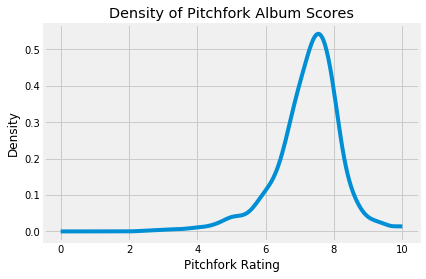

In [5]:
#plotting rating density
density = gaussian_kde(album_df['score_amax'])
xs = np.linspace(0,10,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.ylabel('Density')
plt.xlabel('Pitchfork Rating')
plt.title('Density of Pitchfork Album Scores')
plt.show()

In [6]:
album_df['score_amax'].mean()

7.247883414295621

In [7]:
len(album_df[album_df['score_amax'] >= 9])

80

In [8]:
len(album_df[album_df['score_amax'] == 10])

21

It appears that Pitchfork tends to rate most albums between 6-8 out of 10 with around 60% of their ratings around 7.5. The average rating for an album is 7.24 and they have only rated 80 albums above 9, 21 of those albums being scored a 10. It is important to note that this is only a subset of pitchforks reviews thus the true distributions would require more data. 

### What are the most commonly reviewed genres?

In [9]:
s = album_df.Genres.value_counts()

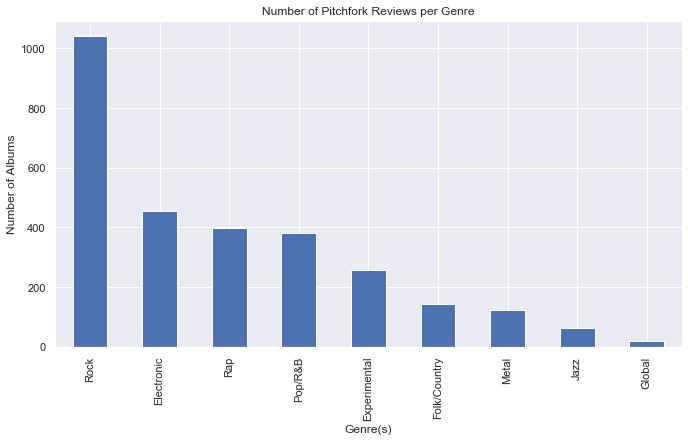

In [58]:
#plot bar chart of reviews per music genre
fig, ax = plt.subplots(figsize=(10,6))
s.plot.bar()
plt.ylabel('Number of Albums')
plt.xlabel('Genre(s)')
plt.title('Number of Pitchfork Reviews per Genre')
plt.show()

It appears that Pitchfork tends to review Rock, Rap, Electronic, and Pop/R&B mostly. Their most commonly reviewed genre is Rock (1041 reviews) which makes sense as they were born as an indie music review website and Indie Rock was the original indie music originating in the 1970's.

Given the vast amount of rock albums collected, I will strongly consider modeling exclusively on those, as different genres require different characteristics to be successful (E.G. rock will have higher instrumentalness compared to rap)

### What is the distribution of explicitness?

In [11]:
# creating separate dataframe exclusively for Rock albums
rock_df = album_df.loc[album_df['Genres'] == 'Rock']

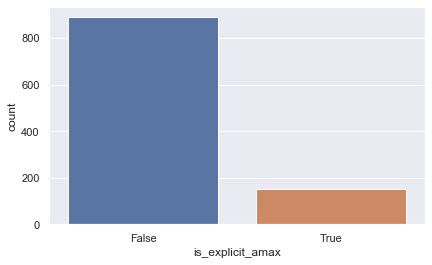

In [12]:
#plot histogram of explicit albums
sns.set(style="darkgrid")
ax = sns.countplot(x="is_explicit_amax", data=rock_df)

From this plot, it is evident that most albums reviewed by pitchfork have no explicit lyrics and the next largest category is all explicit lyrics. Albums tend to either be completely explicity or have no explicit lyrics. This makes sense because it requires just one swear word, sexual or violence reference to earn what I like to refer to as the coveted "badge of Explicitness".

Non explicit albums outnumber explicit albums at a ratio of almost 10:1, so we'll discard explicitness as a predictor in the modeling.

# Distributions of values by score in Rock

## Instrumentalness

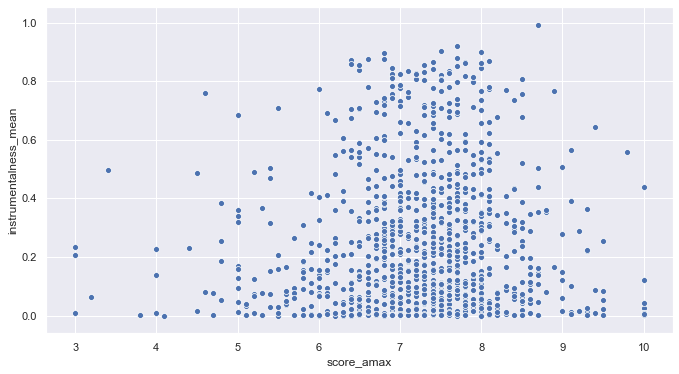

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="score_amax", y="instrumentalness_mean", 
                data=rock_df)


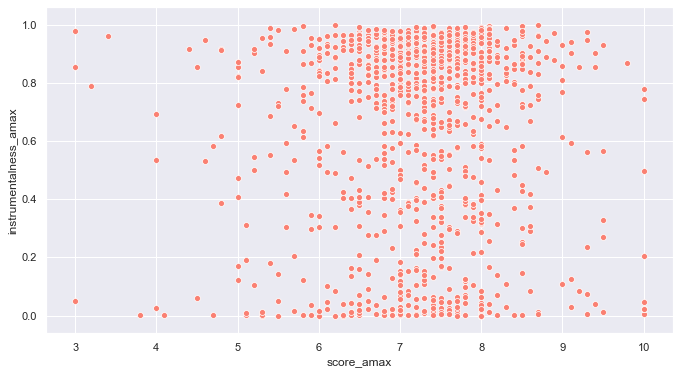

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="score_amax", y="instrumentalness_amax", 
                data=rock_df, color='salmon')

## Acousticness

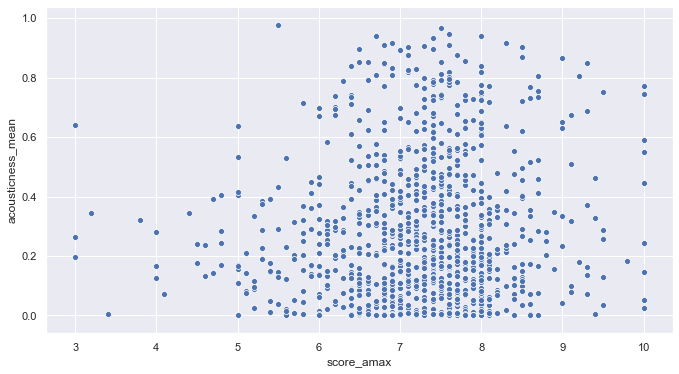

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="score_amax", y="acousticness_mean", 
                data=rock_df)

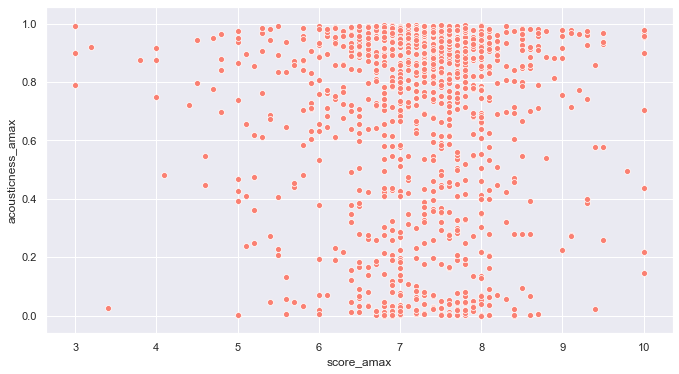

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="score_amax", y="acousticness_amax", 
                data=rock_df, color='salmon')

## Liveness

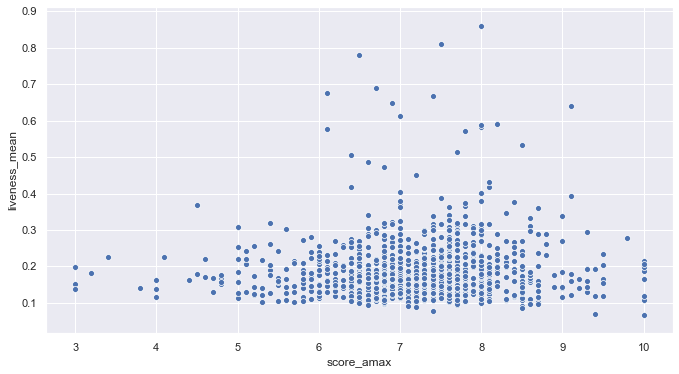

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="score_amax", y="liveness_mean", 
                data=rock_df)


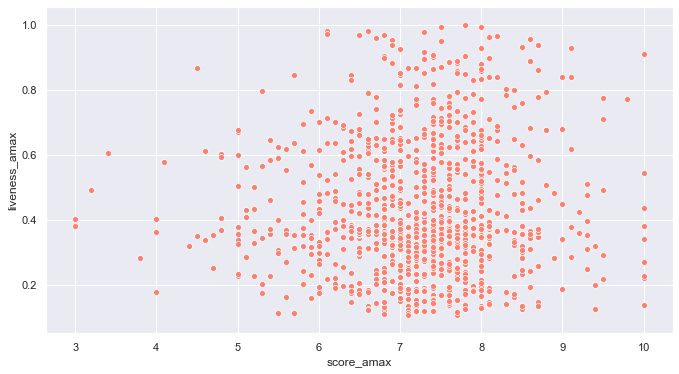

In [50]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="score_amax", y="liveness_amax", 
                data=rock_df, color='salmon')


## Danceability

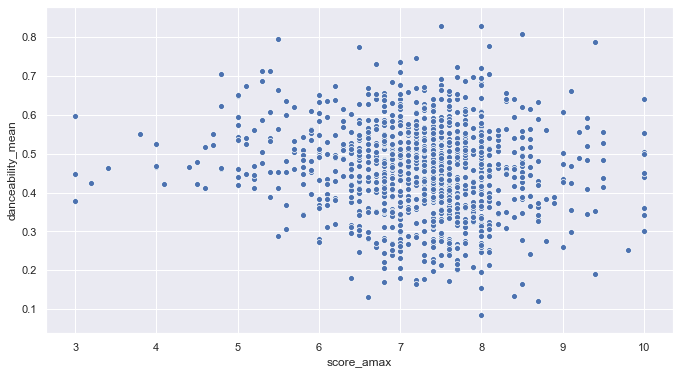

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="score_amax", y="danceability_mean", 
                data=rock_df)

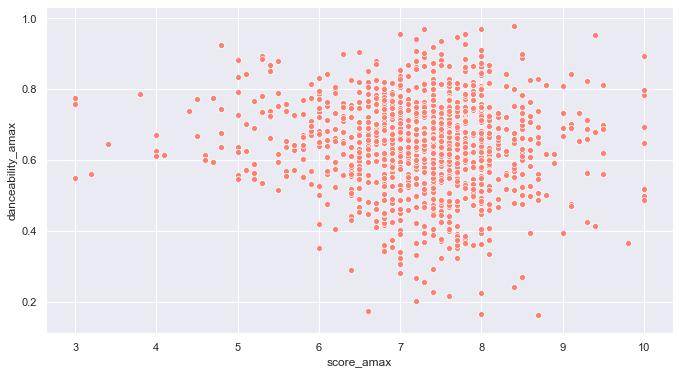

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="score_amax", y="danceability_amax", 
                data=rock_df, color='salmon')

## Popularity

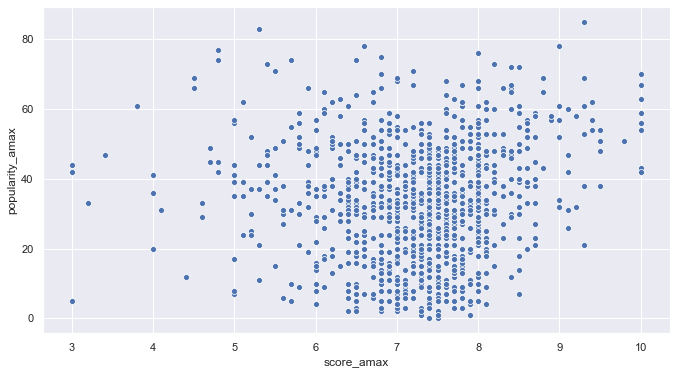

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="score_amax", y="popularity_amax", 
                data=rock_df)

## Speechiness

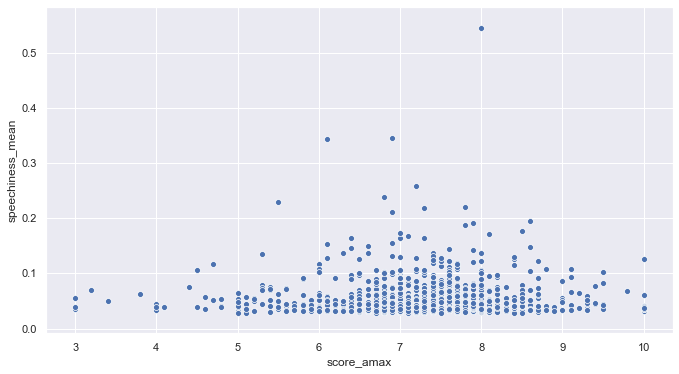

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="score_amax", y="speechiness_mean", 
                data=rock_df)

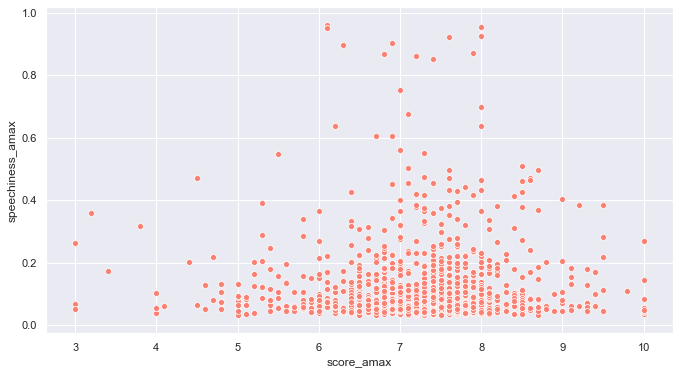

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="score_amax", y="speechiness_amax", 
                data=rock_df, color='salmon')

## Loudness

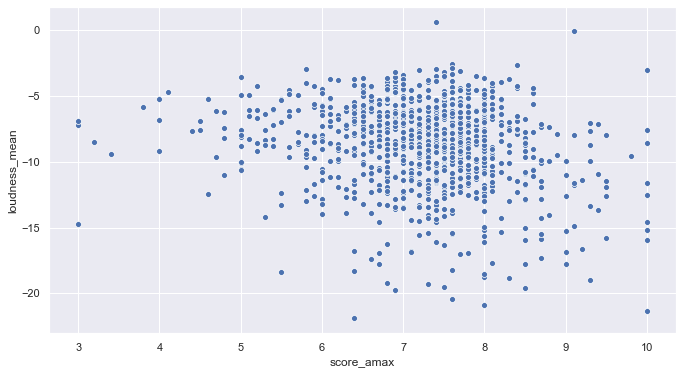

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="score_amax", y="loudness_mean", 
                data=rock_df)

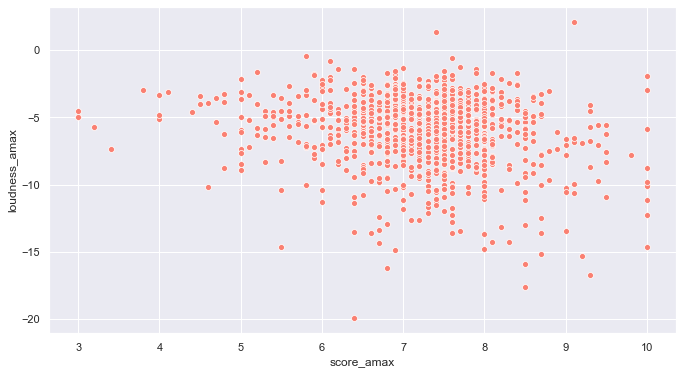

In [53]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="score_amax", y="loudness_amax", 
                data=rock_df, color='salmon')

## Energy

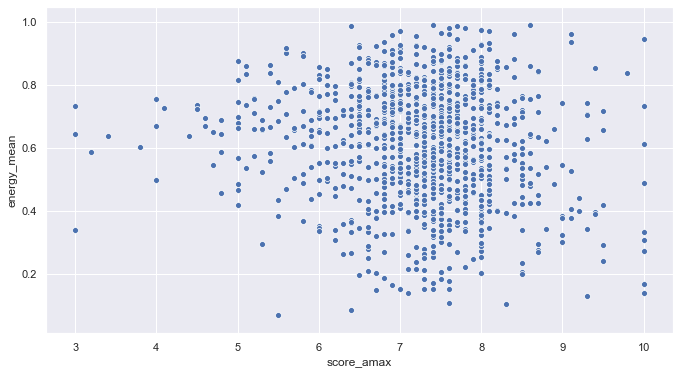

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="score_amax", y="energy_mean", 
                data=rock_df)

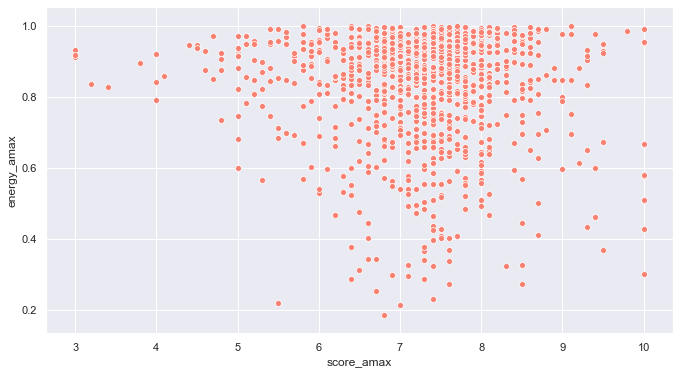

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="score_amax", y="energy_amax", 
                data=rock_df, color='salmon')

## Valence

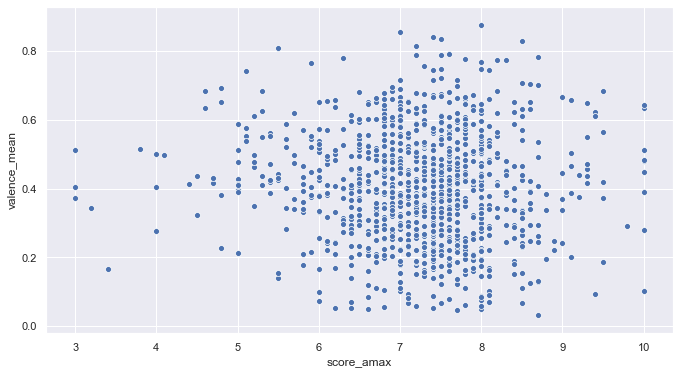

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="score_amax", y="valence_mean", 
                data=rock_df)

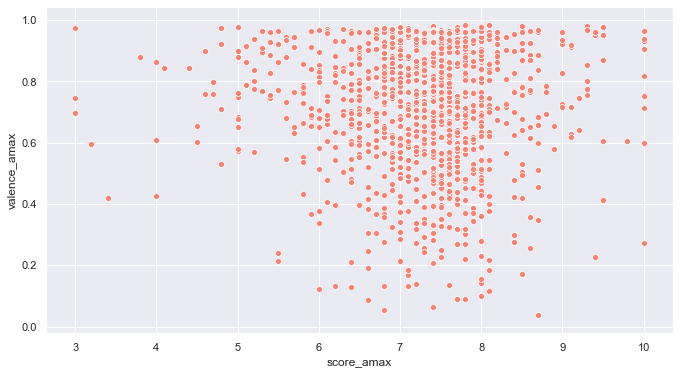

In [55]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="score_amax", y="valence_amax", 
                data=rock_df, color='salmon')

All the features tend to be normally distributed around the average score (7.5). The values are also distributed in a somewhat predictable way: rock music tends to be very energetic, positive and strictly played with acoustic and/or electric instruments (not to be confused with electronic, such as samplers, drum machines or sequencers) and a relative minimal focus on lyrics, indicated by generally low speechiness values. It's quite curious to see danceability with relatively high values. There's a lot of obvious colinearity between each mean-max pair, so we'll run separate models to see which group has the most significance. This can be seen as a test to see how an album should sound as a whole (mean) and the ideal values for the individual songs (max).